In [5]:
!pip install tensorflow

In [17]:
!pip install keras-tuner

C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.0733
Test Accuracy: 0.8497


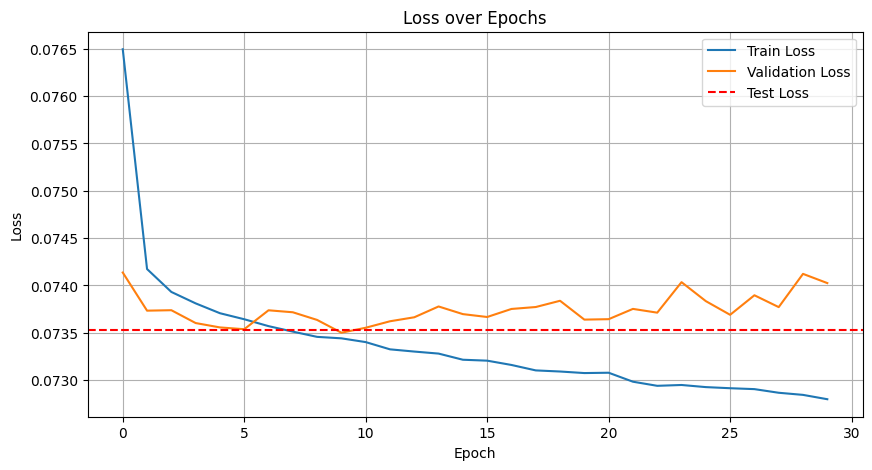

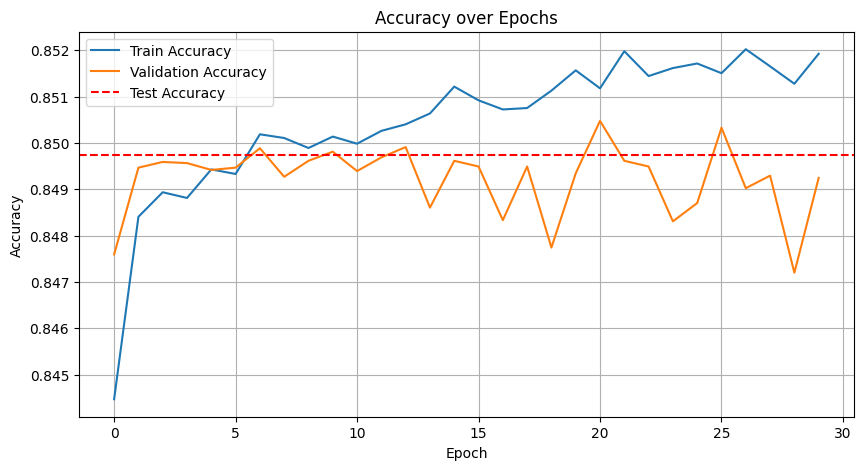

In [8]:
'Uncleaned data set: 21 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'21 neurons'
'3 layers'
'relu for 3 and softmaxfor output'
'batch size = 32'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/OriginalData.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(21, input_dim=21, activation='relu'))   # First hidden layer
model.add(Dense(21, activation='relu'))                # Second hidden layer
model.add(Dense(21, activation='relu'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8471 - loss: 0.0745
Test Accuracy: 0.8465


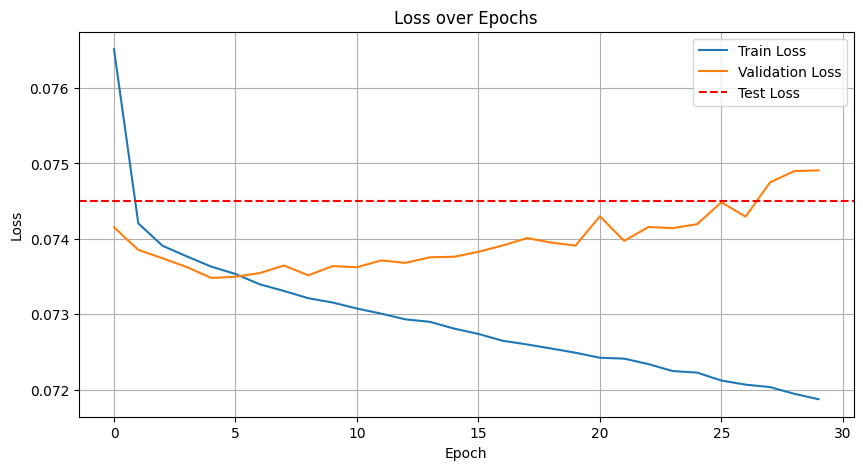

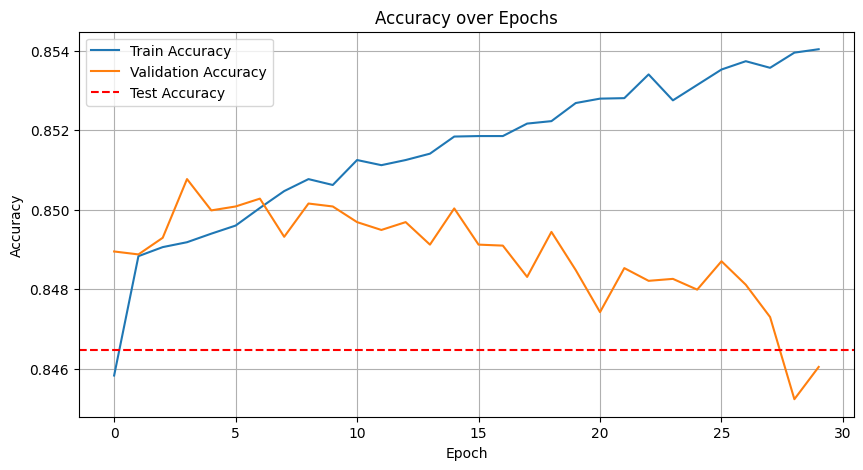

In [9]:
'Uncleaned data set: 32 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'32 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 64'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/OriginalData.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu'))   # First hidden layer
model.add(Dense(32, activation='relu'))                # Second hidden layer
model.add(Dense(32, activation='relu'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8821 - loss: 0.0613
Test Accuracy: 0.8808


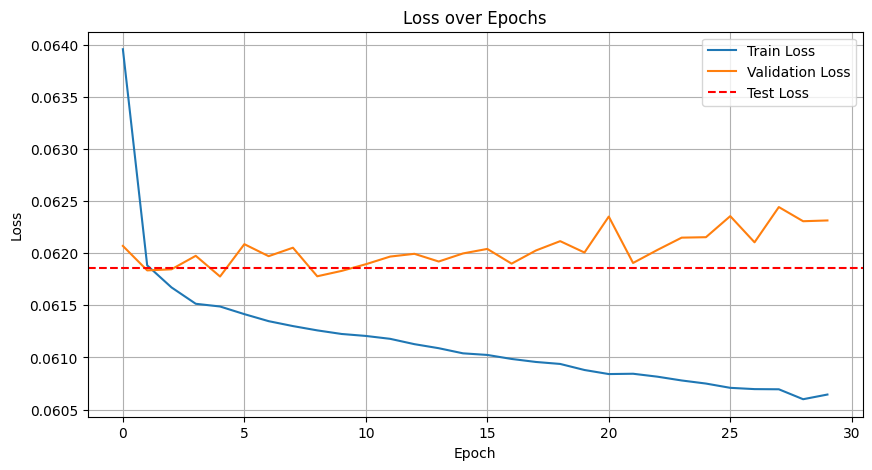

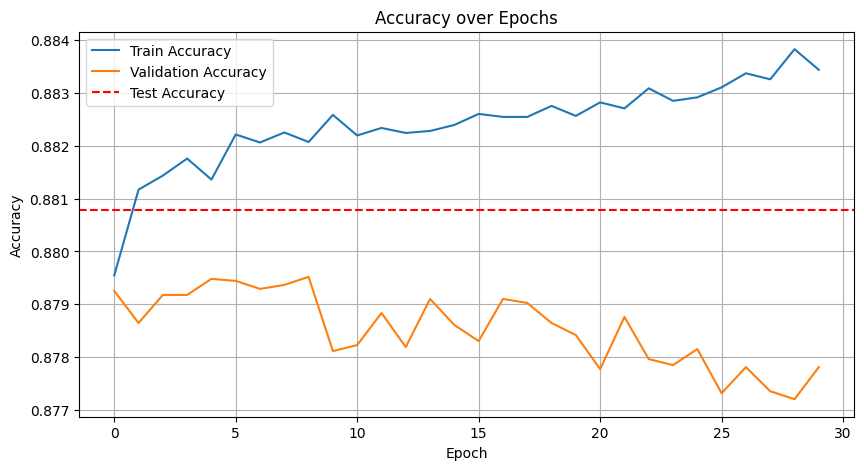

In [10]:
'Cleaned data set: 21 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'21 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 32'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/cleaned_diabetes.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(21, input_dim=13, activation='relu'))   # First hidden layer
model.add(Dense(21, activation='relu'))                # Second hidden layer
model.add(Dense(21, activation='relu'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1028/1028 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8810 - loss: 0.0618
Test Accuracy: 0.8798


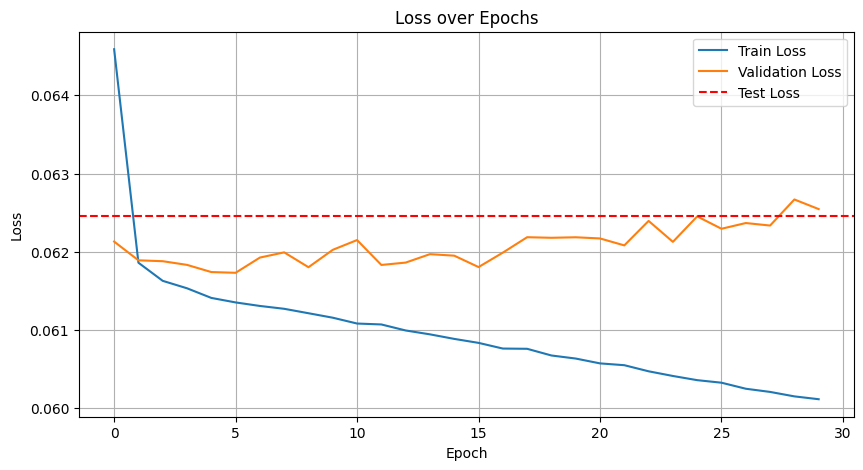

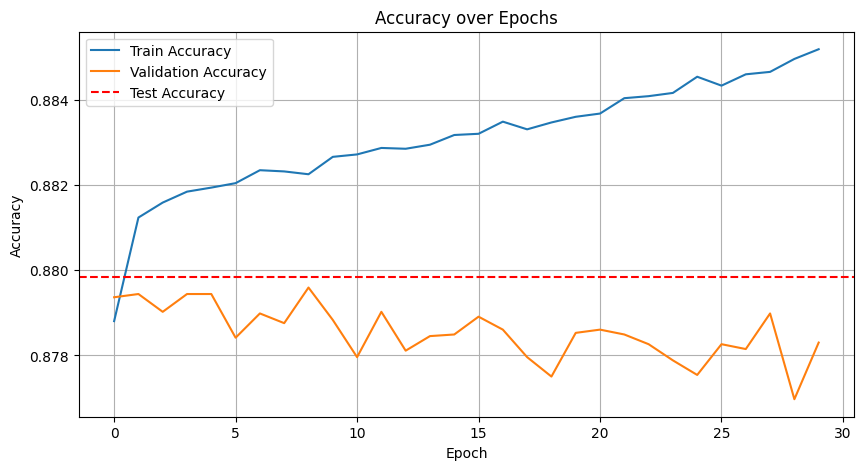

In [11]:
'Uncleaned data set: 32 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'32 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 64'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/cleaned_diabetes.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))   # First hidden layer
model.add(Dense(32, activation='relu'))                # Second hidden layer
model.add(Dense(32, activation='relu'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'50-50 set 21 neurons'
'traing 80%'
'loss:MSE'
'epoch:10'
'21 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 32'
'binary classification' 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras_tuner as kt 
import tensorflow as tf

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/fiftyfifty.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define model builder for Keras Tuner ----
def build_model(hp):
    model = Sequential()
    
    # Hidden layers: fixed 3 layers, tunable neurons
    for i in range(3):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=64, step=8),
            activation='relu',
            input_dim=21 if i == 0 else None
        ))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile with tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# ---- Set up tuner ----
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='binary_50_50'
)

# ---- Search for best hyperparameters ----
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# ---- Retrieve best model ----
best_model = tuner.get_best_models(num_models=1)[0]

# ---- Evaluate on test data ----
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Best model Test Accuracy: {test_acc:.4f}")

# ---- Plot training history ----
best_history = best_model.history.history if hasattr(best_model, "history") else None

# If best_model.history is not available, retrain with best hyperparams to get it
if best_history is None:
    history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
else:
    train_loss = best_history['loss']
    val_loss = best_history['val_loss']
    train_acc = best_history['accuracy']
    val_acc = best_history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.1916
Test Accuracy: 0.9036


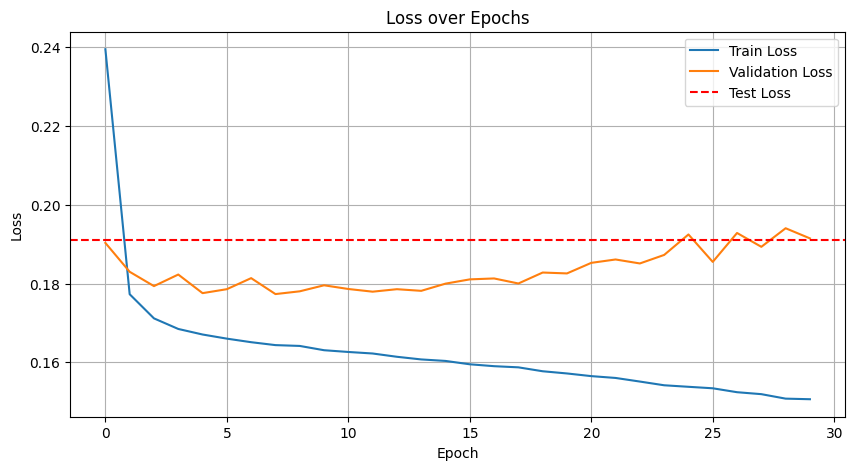

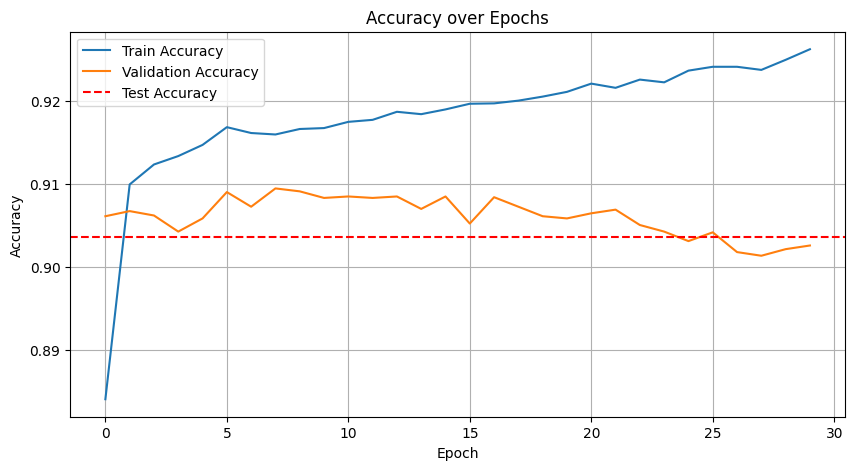

In [5]:
'''new dataset'''
'Uncleaned data set: 32 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'32 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 64'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu'))   # First hidden layer
model.add(Dense(32, activation='relu'))                # Second hidden layer
model.add(Dense(32, activation='relu'))                 # Third hidden layer
model.add(Dense(2, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.1893
Test Accuracy: 0.9036


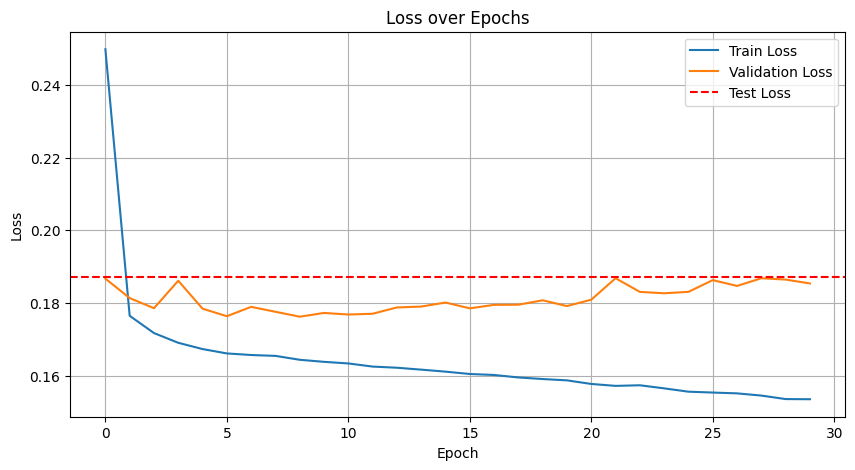

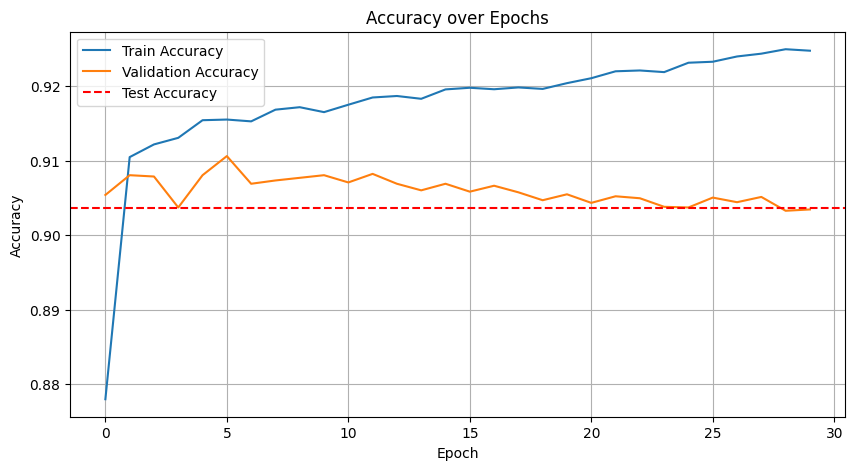

In [6]:
'''new dataset'''
'Uncleaned data set: 32 neurons'
'traing 80%'
'loss:MSE'
'epoch:30'
'32 neurons'
'3 layers'
'relu for 3 and softmax for output'
'batch size = 64'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu'))   # First hidden layer
model.add(Dense(32, activation='relu'))                # Second hidden layer
model.add(Dense(32, activation='relu'))                 # Third hidden layer
model.add(Dense(2, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0,validation_split=0.2)

# Metrics
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
!pip install keras-tuner --upgrade

In [9]:
# --- Import libraries ---
%matplotlib inline
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Load and preprocess data ---
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

# Assume first column is the label
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Should be 0 or 1 for binary

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Define model builder for KerasTuner ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Run the tuner ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='.',
    project_name='bmi_tuning'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64, verbose=1)

# --- Evaluate best model ---
best_model = tuner.get_best_models(1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\n Best model test accuracy: {test_acc:.4f}")

# --- Show best hyperparameters ---
best_hps = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters Found:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")


Trial 10 Complete [00h 01m 02s]
val_accuracy: 0.9078772664070129

Best val_accuracy So Far: 0.9110600352287292
Total elapsed time: 00h 09m 53s


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9078 - loss: 0.1806

 Best model test accuracy: 0.9102

🎯 Best Hyperparameters Found:
units1: 16
num_layers: 3
units_0: 16
activation: relu
learning_rate: 0.006156805850411143
units_1: 80
units_2: 128


In [11]:
# --- Imports ---
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and preprocess data ---
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0 or 1 for binary

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- KerasTuner model builder ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Tuner setup ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=1,
    overwrite=True,
    directory='.',
    project_name='bmi_tuning'
)

# --- Early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Run search ---
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64, callbacks=[early_stop], verbose=1)

# --- Best model and training history ---
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# Re-train best model to get history
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stop], verbose=0)

# --- Evaluate model ---
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nBest model test accuracy: {test_acc:.4f}")
print("\nBest Hyperparameters:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Confusion matrix & classification report ---
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Trial 26 Complete [00h 00m 44s]
val_accuracy: 0.9092034101486206

Best val_accuracy So Far: 0.9120325446128845
Total elapsed time: 00h 12m 35s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
16                |32                |units1
5                 |4                 |num_layers
128               |96                |units_0
tanh              |relu              |activation
0.00010677        |0.0092167         |learning_rate
64                |16                |units_1
112               |16                |units_2
80                |16                |units_3
16                |None              |units_4
32                |None              |units_5

Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7651 - loss: 0.4677 - val_accuracy: 0.8651 - val_loss: 0.3019
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8777 - loss: 0.2762 - val_accuracy: 0.8818 - val_loss: 0.2554
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

KeyboardInterrupt: 

In [12]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and preprocess data ---
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")
df.drop_duplicates(inplace=True)
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0 or 1 for binary

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- KerasTuner model builder ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu'])
        ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Tuner setup ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=1,
    overwrite=True,
    directory='.',
    project_name='bmi_tuning'
)

# --- Early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Run search ---
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64, callbacks=[early_stop], verbose=1)

# --- Best model and training history ---
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# Re-train best model to get history
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stop], verbose=0)

# --- Evaluate model ---
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nBest model test accuracy: {test_acc:.4f}")
print("\nBest Hyperparameters:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Confusion matrix & classification report ---
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Trial 13 Complete [00h 00m 21s]
val_accuracy: 0.9011334180831909

Best val_accuracy So Far: 0.9037051200866699
Total elapsed time: 00h 05m 23s

Search: Running Trial #14

Value             |Best Value So Far |Hyperparameter
96                |32                |units1
5                 |4                 |num_layers
16                |32                |units_0
relu              |relu              |activation
0.00022063        |0.0026049         |learning_rate
32                |16                |units_1
64                |96                |units_2
48                |48                |units_3
64                |128               |units_4
80                |32                |units_5

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7803 - loss: 0.4286 - val_accuracy: 0.8985 - val_loss: 0.2051
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9020 - loss: 0.1964 - val_accuracy: 0.8981 - val_loss: 0.1970
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

KeyboardInterrupt: 

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf # Import tensorflow for specific layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # Added Dropout and BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD # Added RMSprop and SGD
from tensorflow.keras.callbacks import EarlyStopping

# Ensure reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --- Load and preprocess data ---
df = pd.read_csv("BMIClassGege.csv")
print(f"Initial number of rows: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Assume first column is the label
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Should be 0 or 1 for binary

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- KerasTuner model builder ---
def build_model(hp):
    model = Sequential()

    # Input Layer
    # Expanded units range and activation choices for the input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_input', ['relu']),
        input_shape=(X_train.shape[1],)
    ))
    # Optional Batch Normalization after input layer
    if hp.Boolean('batch_norm_input'):
        model.add(BatchNormalization())
    # Optional Dropout after input layer
    if hp.Boolean('dropout_input'):
        model.add(Dropout(hp.Float('dropout_rate_input', min_value=0.1, max_value=0.5, step=0.1)))


    # Hidden Layers
    # Tunable number of hidden layers (1 to 6)
    for i in range(hp.Int('num_layers', 1, 6)):
        # Expanded units range and activation choices for hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice(f'activation_{i}', ['relu'])
        ))
        # Optional Batch Normalization for each hidden layer
        if hp.Boolean(f'batch_norm_{i}'):
            model.add(BatchNormalization())
        # Optional Dropout for each hidden layer
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Tunable optimizer and learning rate
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(hp.Float('learning_rate_adam', 1e-5, 1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(hp.Float('learning_rate_rmsprop', 1e-5, 1e-2, sampling='log'))
    else: # sgd
        optimizer = SGD(hp.Float('learning_rate_sgd', 1e-5, 1e-2, sampling='log'))

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# --- Tuner setup ---
# Changed to Hyperband for more efficient search
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=100, # Maximum number of epochs to train a model for
    factor=3,       # Reduction factor for Hyperband. Reduces models by this factor in each round.
    hyperband_iterations=2, # Number of times to run the Hyperband algorithm. More iterations means more thorough search.
    overwrite=True,
    directory='.',
    project_name='bmi_tuning_hyperband_v2' # Changed project name to avoid conflicts
)

# --- Early stopping ---
# Increased patience to allow more epochs before stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Run search ---
# Increased epochs for the tuner search to allow early stopping to work effectively
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, callbacks=[early_stop], verbose=1)

# --- Best model and training history ---
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# Re-train best model on the entire training data to get history
# Using the same early_stop callback to find the optimal number of epochs for the best model
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64, callbacks=[early_stop], verbose=0) # Increased max epochs for final fit

# --- Evaluate model ---
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nBest model test accuracy: {test_acc:.4f}")
print("\nBest Hyperparameters:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Confusion matrix & classification report ---
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Trial 395 Complete [00h 00m 19s]
val_accuracy: 0.9018954038619995

Best val_accuracy So Far: 0.9052290916442871
Total elapsed time: 01h 53m 55s

Search: Running Trial #396

Value             |Best Value So Far |Hyperparameter
256               |64                |units_input
relu              |relu              |activation_input
False             |True              |batch_norm_input
True              |False             |dropout_input
1                 |1                 |num_layers
160               |128               |units_0
relu              |relu              |activation_0
False             |False             |batch_norm_0
False             |True              |dropout_0
adam              |rmsprop           |optimizer
0.0059988         |0.0009212         |learning_rate_adam
0.3               |0.3               |dropout_rate_input
0.3               |0.5               |dropout_rate_0
160               |256               |units_1
relu              |relu              |activation_1
True 

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.9078772664070129

Best val_accuracy So Far: 0.9099106788635254
Total elapsed time: 00h 03m 17s


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.1842

Best model test accuracy: 0.9083

Best Hyperparameters:
units1: 96
num_layers: 5
units_0: 80
activation: relu
learning_rate: 0.004918860745687648
units_1: 80
units_2: 112
units_3: 112
units_4: 48
units_5: 80


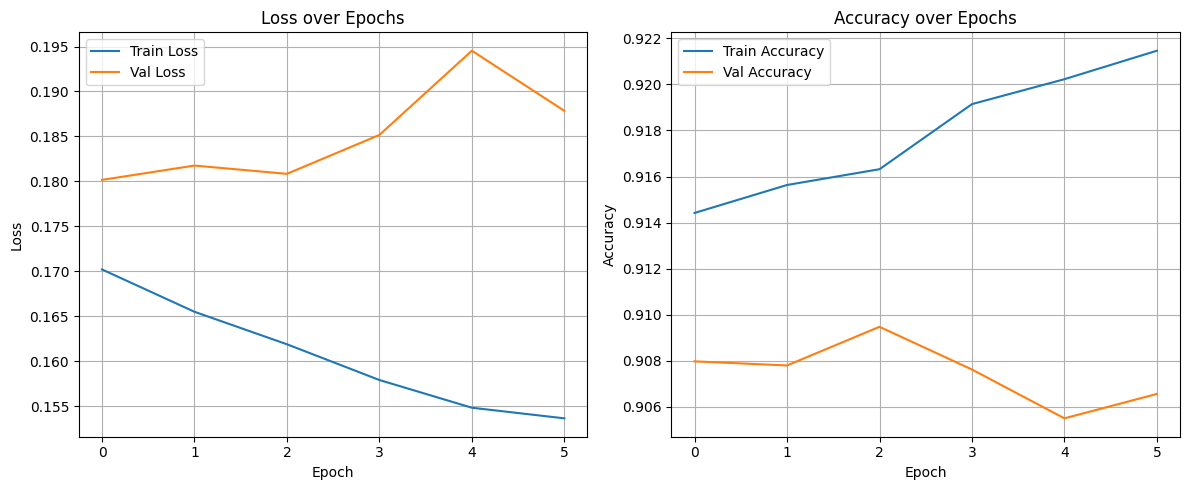

In [5]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and preprocess data ---
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/FinalDataSet.csv")

# --- EXTRACT TARGET ---
y = df.iloc[:, 0].values.astype(np.float32)

X_raw = df.iloc[:, 1:]  # all features
X_encoded = pd.get_dummies(X_raw.astype(str), prefix=X_raw.columns.astype(str))

X = X_encoded.values

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- KerasTuner model builder ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu'])
        ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Tuner setup ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='.',
    project_name='bmi_tuning'
)

# --- Early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Run search ---
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64, callbacks=[early_stop], verbose=1)

# --- Best model and training history ---
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# Re-train best model to get history
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stop], verbose=0)

# --- Evaluate model ---
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nBest model test accuracy: {test_acc:.4f}")
print("\nBest Hyperparameters:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

